In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [61]:
x = np.linspace(-10,10,300)
sin_y = np.sin(x)
cos_y = np.cos(x)

[]

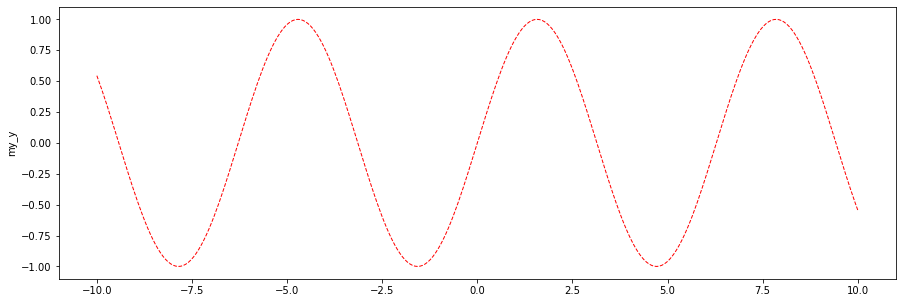

In [62]:
plt.figure(figsize=(15, 5))
plt.plot(x,sin_y,color='red', marker='', linestyle='dashed', linewidth=1, markersize=1)
plt.gray()
plt.ylabel("my_y")
plt.plot()

In [63]:
gist_x = np.random.normal(0.9,1,1000)
gist_x2 = np.random.normal(2,2,1000)

(array([  3.,  24., 106., 170., 226., 247., 142.,  62.,  14.,   6.]),
 array([-2.34045182, -1.67667079, -1.01288976, -0.34910873,  0.3146723 ,
         0.97845333,  1.64223436,  2.30601538,  2.96979641,  3.63357744,
         4.29735847]),
 <BarContainer object of 10 artists>)

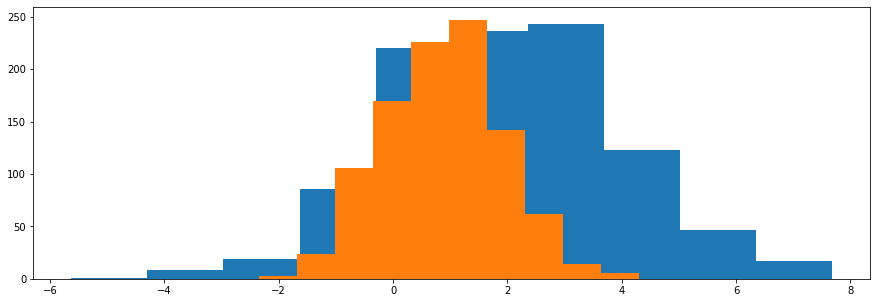

In [64]:
plt.figure(figsize=(15, 5))
plt.hist(gist_x2)
plt.hist(gist_x)

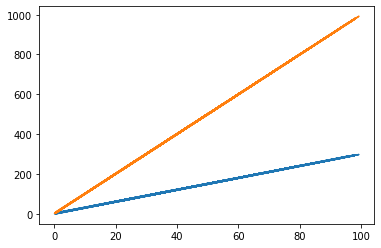

In [65]:
noise = np.random.normal(0,1,300)

x = np.random.uniform(0, 100, 300)
y3 = np.random.uniform(0, 100, 300)
y1 = 3 * x + noise
y2 = 10 * x + noise
plt.plot(x, y1)
plt.plot(x, y2)

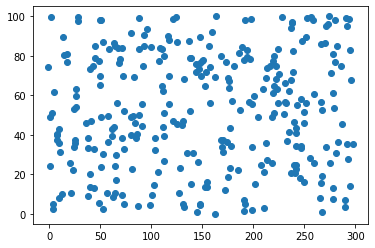

In [66]:
plt.scatter(y1,y3)

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/visual.png?raw=true" height="400" width="700">
</center>

# <center> Визуализация данных в python </center>

Визуализация занимает важную часть в анализе данных. Представляя информацию в графическом виде, вы облегчаете процесс ее восприятия, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных.

Начнем с небольшой "памятки", о которой всегда нужно помнить при создании любых графиков.

## <center> Как визуализировать данные и заставить всех тебя ненавидеть </center>

1. Заголовок графика для слабаков. По графику всегда понятно, какие данные и явления он описывает.
2. Ни в коем случае не подписывай ни одной оси у графика. Пусть смотрящий развивает свою интуицую!
3. Единицы измерения совсем не обязательны. Какая разница, в чем измеряли количество - в людях или в литрах!
4. Чем меньше шрифт на графике, тем острее зрение смотрящего.
5. На одном графике нужно стараться уместить всю информацию, которая у тебя есть в датасете. С полными названиями, расшифровками, сносками. Чем больше текста - тем информативнее!
6. При любой возможности используйте 3D и спецэффекты, пусть знают, что ты — прирожденный дизайнер. К тому же, так будет меньше визуальных искажений.

Если серьезно, то обязательно посмотрите список рекомендованных материалов в конце ноутбука по правилам оформления графиков и работе с библиотеками для визуализации данных в Python.  

Основные библиотеки для визуализации в Python - это `matplotlib`, `seaborn`, `plotly`. Сегодня познакомимся с первыми двумя

In [2]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns


# plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

# Продажи и оценки видеоигр

Работаем с датасетом по продажам и оценкам видео-игр. Датасет взят с [Кеггла](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

__Описание колонок:__
* `Name` $-$ название видеоигры
* `Platform` $-$ платформа, на которой игра была запущена
* `Year_of_Release` $-$ год релиза
* `Genre` $-$ жанр
* `Publisher` $-$ издатель
* `NA_Sales` $-$ объем продаж в Северной Америке (в млн штук)
* `EU_Sales` $-$ объем продаж в Евросоюзе (в млн штук)
* `JP_Sales` $-$ объем продаж в Японии (в млн штук)
* `Other_Sales` $-$ объем продаж в остальном мире (в млн штук)
* `Global_Sales` $-$ общий объем продаж (в млн штук)
* `Critic_Score` $-$ совокупный балл, составленный сотрудниками Metacritic
* `Critic_Count` $-$ кол-во критиков, оцениваемых игру
* `User_Score` $-$ совокупный балл, составленный подписчиками Metacritic (пользователями)
* `User_Count` $-$ кол-во пользователей, оцениваемых игру
* `Developer` $-$ ответственный за создание игры
* `Rating` $-$ рейтинг (Everyone, Teen, Adults Only и тд)

In [3]:
df = pd.read_csv('data/video_games_sales.csv')

In [8]:
df.sort_values(by="Year_of_Release")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14472,Alter Ego,PC,1985,Simulation,Activision,0.00,0.03,0.00,0.01,0.03,59.0,9,5.8,19,"Viva Media, Viva Media, LLC",T
14623,SimCity,PC,1988,Simulation,Maxis,0.00,0.02,0.00,0.01,0.03,64.0,75,2.2,4572,Maxis,E10+
14612,Doom,PC,1992,Shooter,id Software,0.02,0.00,0.00,0.00,0.03,85.0,44,8.2,1796,id Software,M
1567,Battle Arena Toshinden,PS,1994,Fighting,Sony Computer Entertainment,0.39,0.26,0.53,0.08,1.27,69.0,4,6.3,4,Tamsoft,T
1160,Diablo,PC,1996,Role-Playing,Activision,0.01,1.58,0.00,0.00,1.59,94.0,12,8.7,850,Blizzard Entertainment,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,UEFA Euro 2016,PS4,2016,Sports,Konami Digital Entertainment,0.00,0.22,0.04,0.04,0.29,72.0,7,6.6,8,Konami,E
15582,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.02,0.00,0.00,0.00,0.02,55.0,13,4.2,94,Inti Creates,E10+
8900,LEGO Harry Potter Collection,PS4,2016,Action,Warner Bros. Interactive Entertainment,0.01,0.11,0.00,0.02,0.15,73.0,16,8.1,7,Warner Bros. Interactive Entertainment,E10+
5008,Deus Ex: Mankind Divided,PS4,2016,Role-Playing,Square Enix,0.11,0.21,0.00,0.06,0.38,84.0,59,7.6,511,Eidos Montreal,M


В данных много пропусков, поэтому давайте выкинем все пропущенные наблюдения. Также видим, что некоторые колонки pandas привел не к тому типу. Исправим это:

In [6]:
df = df.dropna()

df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [7]:
df.shape

(6825, 16)

## 1. Изучаем основы matplotlib на примере линейных графиков

Самый простой вариант создания графика в matplotlib - функция `plt.plot()`, которой мы передаем два аргумента - что положить на ось _x_, а что на _y_. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot)

`plt.plot(x = ___, y = ___)`

**Посмотрим на динамику продаж игр в мире по годам:**

In [21]:
gb.values

array([[0.0000e+00, 3.0000e-02, 0.0000e+00],
       [0.0000e+00, 2.0000e-02, 0.0000e+00],
       [2.0000e-02, 0.0000e+00, 0.0000e+00],
       [3.9000e-01, 2.6000e-01, 5.3000e-01],
       [7.9100e+00, 6.8800e+00, 4.0600e+00],
       [1.5340e+01, 8.6700e+00, 9.0100e+00],
       [1.8130e+01, 1.2130e+01, 1.0810e+01],
       [2.3320e+01, 1.5690e+01, 9.6700e+00],
       [3.9340e+01, 2.5200e+01, 1.1270e+01],
       [1.3932e+02, 7.2850e+01, 2.3570e+01],
       [1.6376e+02, 8.4030e+01, 1.8610e+01],
       [1.4308e+02, 7.5160e+01, 1.7240e+01],
       [1.7388e+02, 8.3010e+01, 2.2740e+01],
       [1.7815e+02, 8.6700e+01, 3.8230e+01],
       [2.2569e+02, 1.0453e+02, 4.0430e+01],
       [2.3561e+02, 1.2471e+02, 3.5040e+01],
       [2.5625e+02, 1.3731e+02, 3.7420e+01],
       [2.3172e+02, 1.4356e+02, 3.4280e+01],
       [2.1324e+02, 1.3013e+02, 2.5190e+01],
       [1.9062e+02, 1.2786e+02, 2.3160e+01],
       [1.3394e+02, 9.9080e+01, 2.7360e+01],
       [1.2089e+02, 9.5540e+01, 1.9050e+01],
       [7.

In [24]:
gb

,NA_Sales,EU_Sales,JP_Sales
Year_of_Release,,,
1985,0.00,0.03,0.00
1988,0.00,0.02,0.00
1992,0.02,0.00,0.00
1994,0.39,0.26,0.53
1996,7.91,6.88,4.06
1997,15.34,8.67,9.01
1998,18.13,12.13,10.81
1999,23.32,15.69,9.67
2000,39.34,25.20,11.27


In [27]:
gb["NA_Sales"]

Year_of_Release
1985      0.00
1988      0.00
1992      0.02
1994      0.39
1996      7.91
1997     15.34
1998     18.13
1999     23.32
2000     39.34
2001    139.32
2002    163.76
2003    143.08
2004    173.88
2005    178.15
2006    225.69
2007    235.61
2008    256.25
2009    231.72
2010    213.24
2011    190.62
2012    133.94
2013    120.89
2014     79.38
2015     67.85
2016     34.52
Name: NA_Sales, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


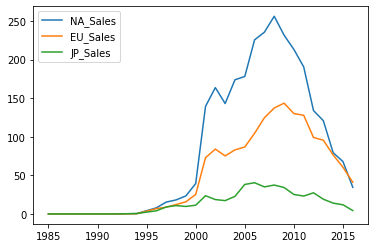

In [30]:
# агрегируем данные за год
gb = df.groupby('Year_of_Release')["NA_Sales","EU_Sales","JP_Sales"].sum()

# строим график
plt.plot(gb.index, gb["NA_Sales"], label="NA_Sales")
plt.plot(gb.index, gb["EU_Sales"], label="EU_Sales")
plt.plot(gb.index, gb["JP_Sales"], label="JP_Sales")
plt.legend()

In [13]:
pd.DataFrame(gb)

,Global_Sales
Year_of_Release,
1985,0.03
1988,0.03
1992,0.03
1994,1.27
1996,20.10
1997,35.01
1998,43.18
1999,51.17
2000,81.24


### Задача №1:

Постройте один график, на котором будут отображаться сразу все показатели продаж (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)

In [ ]:
## Ваш код

В идеальной вселенной мы создаем графики функцией `subplots`, которая генерирует наш график в 2 переменные (обычно их называют fig и ax):

* `fig` отвечает за график в целом. Воспринимайте ее как файл, который хранит график как картинку.
* `ax` $-$ это ось координат, на которой мы собственно строим график. Все элементы графика хранятся как раз в ней.

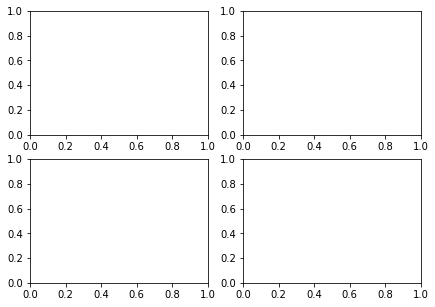

In [33]:
fig, ax = plt.subplots(2,2, figsize=(7,5)) # создали полоино для графика из 1 ряда и 1 колонки (1 график)
                                           # figsize -это размер нашего прямоугольника в неочевидных единицах. 
                                           # Какой размер удачный? экспериментируйте!

**Посмотрим на динамику продаж игр в мире по годам, но теперь используем `subplots`**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


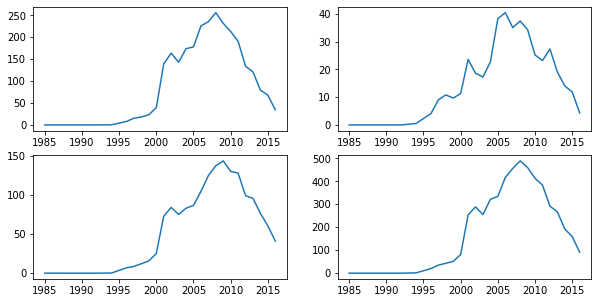

In [36]:
# строим график

gb = df.groupby('Year_of_Release')["Global_Sales", "NA_Sales","EU_Sales","JP_Sales"].sum()

fig, ax = plt.subplots(2,2, figsize=(10,5))

# строим график
ax[0, 0].plot(gb.index, gb["NA_Sales"], label="NA_Sales")
ax[1, 0].plot(gb.index, gb["EU_Sales"], label="EU_Sales")
ax[0, 1].plot(gb.index, gb["JP_Sales"], label="JP_Sales")
ax[1, 1].plot(gb.index, gb["Global_Sales"], label="Global_Sales")

В переменной _ax_ на самом деле лежит куча методов, которые позволяют сделать график более приятным. Посмотрим на несколько из них:

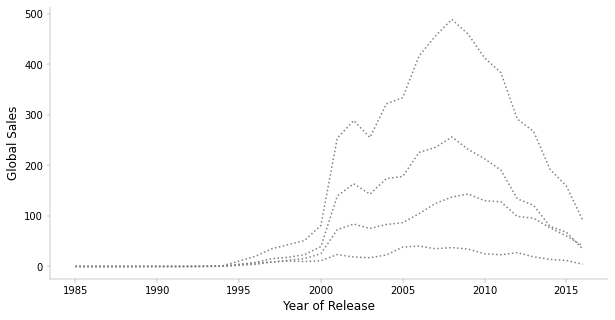

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 

# параметры самого графика (цвет линии, стиль и т.д.) определяем как параметры в методе plot()
# меняем цвет и стиль линии на пунктир. Matplotlib знает некоторые стандартные цвета, и их можно задать прямо словом
# так же можно передать hex цвет. Например, #8c92ac
ax.plot(gb.index, gb.values, color = 'grey', ls = ':')  


# если вы обратили внимание, то в нашем самом первом графике шкала с годами сломамлась и стала float. Matplotlib принудительно 
# делает x непрерывной переменной для линейного графика. Мы хотим оставить шкалу год в целых числах.
ax.locator_params(integer=True) 

# называем шкалы x и y, выбираем размер шрифта.
ax.set_xlabel('Year of Release', fontsize=12)
ax.set_ylabel('Global Sales', fontsize=12)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# делаем засечки на шкалах x и y потоньше
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

# уменьшаем толщину оставших границ графика с помощью цикла 
# (можно и без цикла отдельной строкой для каждой границы, как делали выше)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

### Создаем систему графиков

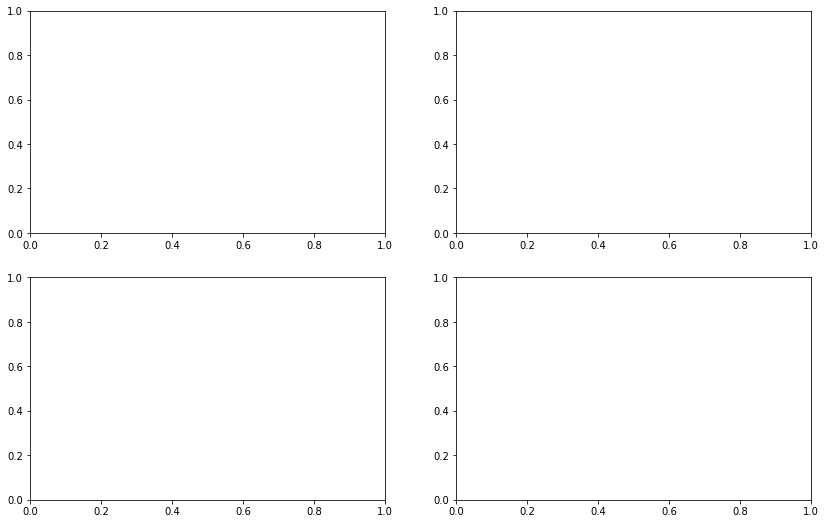

In [38]:
fig, ax = plt.subplots(2,2, figsize=(14,9)) # увеличиваем количество объектов до двух рядов и двух колонок.

Теперь у нас есть четыре графика! 

Объект _ax_ в данном случае **становится матрицой**. И чтобы обратиться к каждому графику, нужно обратиться к нему по индексу из _ax_.

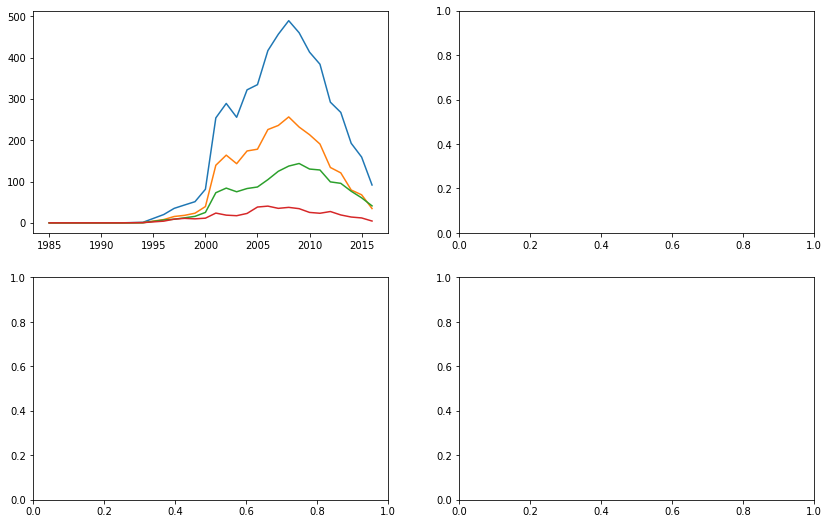

In [39]:
fig, ax = plt.subplots(2,2, figsize=(14,9))

ax[0][0].plot(gb.index, gb.values);

Ниже посмотрим как с помощью цикла for можно применить какую-то модификацию ко всем графикам системы.

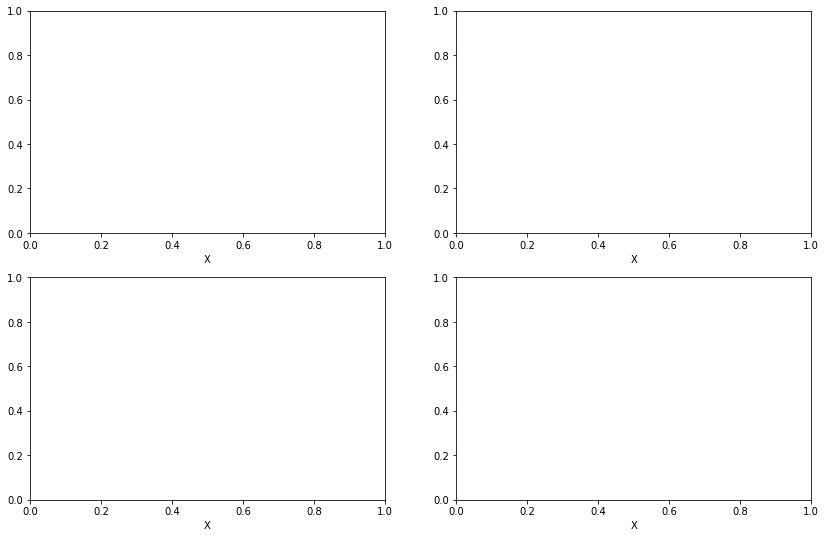

In [40]:
fig, ax= plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('X')

### Задача №2:

Создайте систему графиков, у которой:
* на 1ом графике изображены продажи в Северной Америке (`NA_Sales`);
* на 2ом продажи в Европейском Союзе (`EU_Sales`);
* на 3ем продажи в Японии (`JP_Sales`)
* на 4ом графике все 3 линии вместе;
* Каждый график должен быть разного цвета. В четвертом графике - каждый график должен быть такого же цвета, как и в своей ячейке + 4ый график должен иметь легенду
* В заголовке к каждому графику напишите то, что стоит у него по оси _y_

In [ ]:
## Ваш код

## 2. Графики для категориальных переменных

**Посмотрим на кол-во игр за каждый год с помощью столбчатой диаграммы:**

In [42]:
df.groupby('Year_of_Release').Name.count()

Year_of_Release
1985      1
1988      1
1992      1
1994      1
1996      7
1997     13
1998     25
1999     30
2000    102
2001    256
2002    455
2003    498
2004    476
2005    562
2006    528
2007    590
2008    592
2009    550
2010    429
2011    453
2012    313
2013    266
2014    253
2015    211
2016    212
Name: Name, dtype: int64

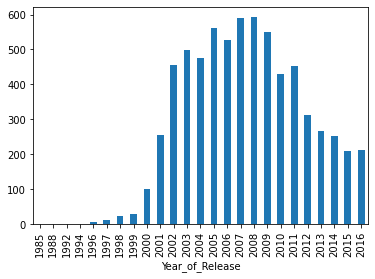

In [49]:
df.groupby('Year_of_Release').Name.count().plot(kind='bar');

**Посмотрим отдельно на кол-во игр жанра Sports и Action за последние 5 лет. Сделаем двойную диаграмму и развернем ее горизонтально**

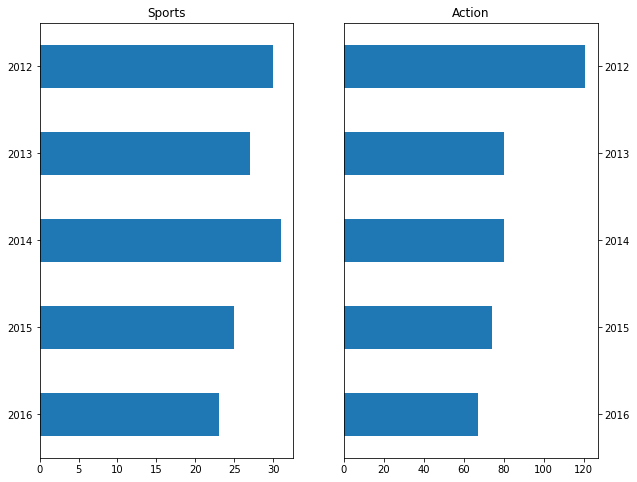

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

gb_sports = df[df.Genre=='Sports'].groupby('Year_of_Release').Name.count().tail(5).sort_index(ascending=False)
gb_sports.plot(kind='barh', ax=ax[0])
ax[0].set_title('Sports')

gb_act = df[df.Genre=='Action'].groupby('Year_of_Release').Name.count().tail(5).sort_index(ascending=False)
gb_act.plot(kind='barh', ax=ax[1])
ax[1].set_title('Action')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False) # убираем подпись к шкале, которая генерируется автоматически

Подумайте, чем плох такой график?

### Задача №3:

С помощью двух вертикальных столбчатых диаграмм выведите среднюю оценку критиков и пользователей игр различных рейтингов. 

In [ ]:
## Ваш код

### Задача №4:

В виде горизонтальной столбчатой диаграммы выведите топ-5 девелоперов с наибольшей средней оценкой от критиков. Рядом выведите диаграмму их самой успешной игры по общим продажам. 

In [ ]:
## Ваш код

### Задача №5:

Сравните оценки игр от критиков для топ-5 крупнейших игровых платформ (по кол-ву игр) с помощью boxplot из пакета seaborn.

In [ ]:
## Ваш код

## 3*. Мультивариативный график рассеяния

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США в 2005 году.

In [51]:
crimes = pd.read_csv('data/crimeRatesByState2005.tsv', sep='\t')
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


График рассеяния (scatter plot) $-$ это такой график, у которого по оси _x_ и _y_ отложены непрерывные переменные. График состоит из точек, каждая из которых отвечает за свое наблюдение. 

Посмотрим на график зависимостей убийств от краж со взломом (burglary)

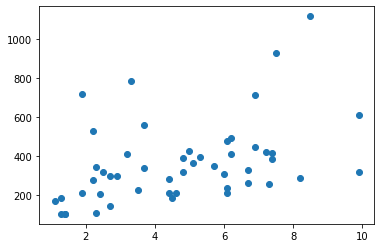

In [53]:
fig, ax = plt.subplots() 
ax.scatter(crimes['murder'], crimes['motor_vehicle_theft']);

Здесь каждая точка отвечает за свой штат. По оси _x_ мы видим сколько в штате было убийств, а по оси _y_ сколько краж со взломом

Попробуем на график добавить дополнительную информацию, например, в качестве размера точки обозначим кол-во населения

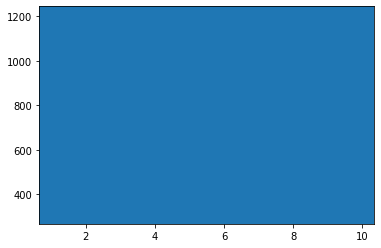

In [54]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']);

Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

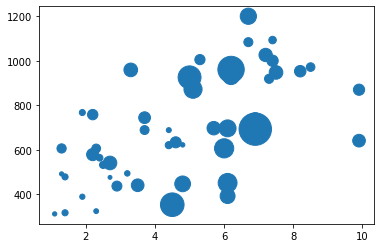

In [55]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000);

Отлично, однако следующая проблема - слияние точек. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

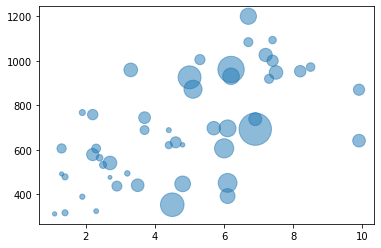

In [56]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5);

Добавим теперь еще какую-нибудь переменную (например, robbery) и засунем ее в параметр цвета 

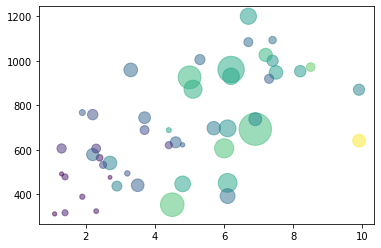

In [57]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, 
           c = crimes['Robbery']); # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции `colorbar()`. Также можем поменять цветовую шкалу с помощью аргумента cmap.

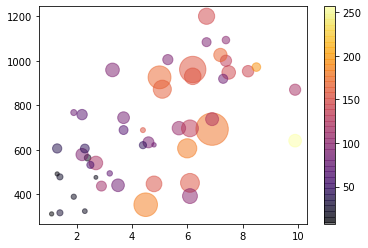

In [58]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, cmap = 'inferno',
           c = crimes['Robbery'])
plt.colorbar(color_graph);

Последнее что тут сделаем - это подпишем штаты

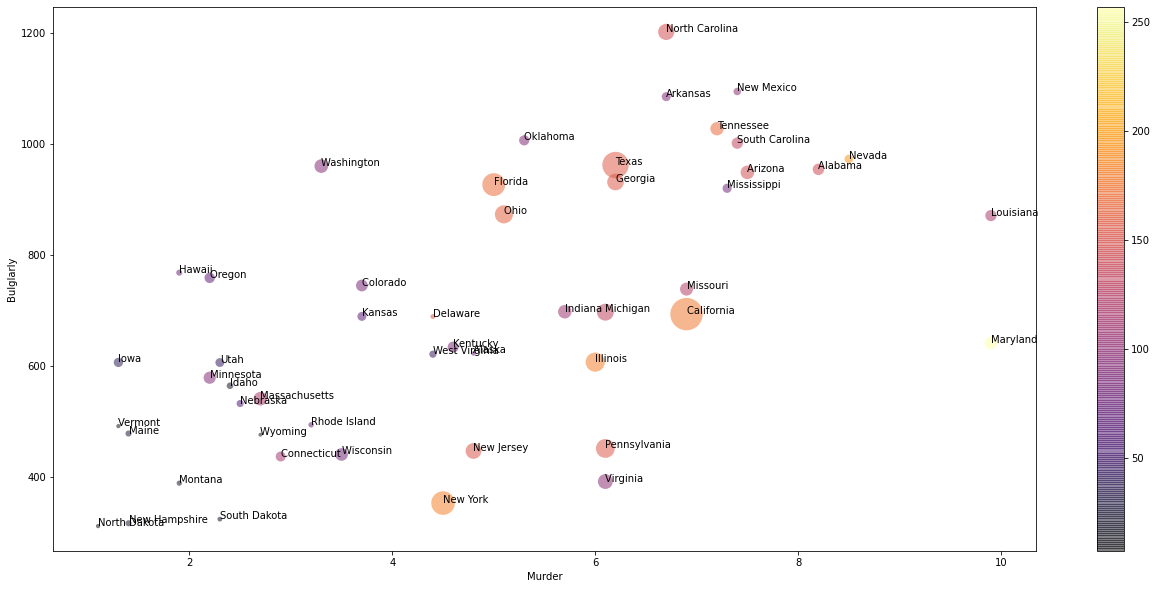

In [59]:
fig, ax = plt.subplots(figsize = (22,10))

color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, 
                         c = crimes['Robbery'], cmap = 'inferno', alpha = 0.5, linewidth = 0)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('Murder', fontsize = 10)
ax.set_ylabel('Bulglarly', fontsize = 10)

for i, state in enumerate(crimes['state']):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(state, (crimes['murder'][i], crimes['burglary'][i]), fontsize = 10) # используем метод annotate, которому говорим, что нужно брать имя штата
                                                                                    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
                                                                                    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
                                                                                    # ряду в датафрейме)
                
plt.colorbar(color_graph);